# 3.Bus EDA

Bus: Jan. 01, 2014 - May 31, 2020

Street car: Jan. 02 2014 - May 31 2020

Subway: Jan. 01 2014 - June 2020 

~700k records of incident delay for the past 6 year 

## 3.1 Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns

In [4]:
bus_df = pd.read_csv('./data/bus_cleaned.csv')

## 3.2 Overview

In [5]:
bus_df.head()

,report_date,Route,Time,Day,Location,Incident,delay_min,gap_min,Direction,Vehicle,report_year,report_month,report_day,report_hour,report_min,at_station,delay_type,direction_simp
0,2014-01-01,95,12:23:00 AM,Wednesday,YORK MILLS STATION,Mechanical,10.0,20.0,E,1734.0,2014,1,1,0,23,1,short,E
1,2014-01-01,102,12:55:00 AM,Wednesday,ENTIRE RUN FOR ROUTE,General Delay,33.0,66.0,b/w,8110.0,2014,1,1,0,55,0,long,W
2,2014-01-01,54,1:28:00 AM,Wednesday,LAWRENCE AND WARDEN,Mechanical,10.0,20.0,WB,7478.0,2014,1,1,1,28,0,short,W
3,2014-01-01,112,1:30:00 AM,Wednesday,KIPLING STATION,Emergency Services,18.0,36.0,N,8084.0,2014,1,1,1,30,1,medium,N
4,2014-01-01,24,1:37:00 AM,Wednesday,VP AND ELLESMERE,Investigation,10.0,20.0,n,7843.0,2014,1,1,1,37,0,short,N


In [6]:
print("There's %s records of incident and %s columns in the bus dataset."%(bus_df.shape[0],bus_df.shape[1]))

There's 461405 records of incident and 18 columns in the bus dataset.


In [7]:
print('The bus dataset starts from %s to %s.'%(bus_df.iloc[0]['report_date'],bus_df.iloc[-1]['report_date']))

The bus dataset starts from 2014-01-01 to 2020-05-31.


In [22]:
bus_df.describe()

,Route,delay_min,gap_min,Vehicle,report_year,report_month,report_day,report_hour,report_min,at_station
count,461405.000000,461405.000000,460843.000000,392467.000000,461405.000000,461405.000000,461405.000000,461405.000000,461405.000000,461405.000000
mean,105.330787,20.551203,30.266833,5637.080537,2016.441954,6.286445,15.730618,11.879165,25.777118,0.344795
std,150.639791,369.732755,74.013518,3288.980639,1.832650,3.480808,8.800236,5.332362,18.316633,0.475302
min,5.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,37.000000,7.000000,12.000000,1609.000000,2015.000000,3.000000,8.000000,7.000000,9.000000,0.000000
50%,68.000000,10.000000,20.000000,7667.000000,2016.000000,6.000000,16.000000,12.000000,26.000000,0.000000
75%,110.000000,15.000000,30.000000,8316.000000,2018.000000,9.000000,23.000000,16.000000,41.000000,1.000000
max,999.000000,246245.000000,6528.000000,86175.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,1.000000


## 3.3 Check Missing values

In [8]:
missing_vals_bus = (bus_df.isnull().sum() / bus_df.shape[0]) * 100 
missing_vals_bus[missing_vals_bus > 0].sort_values(ascending=False)

Vehicle           14.940887
Direction          2.103575
direction_simp     0.470953
Incident           0.202208
Location           0.160380
gap_min            0.121802
dtype: float64

### Insights
- There's a lot of vehicle numbers missing in the bus dataset at about 15%.
- Bound column in the subway dataset has 22% missing values.

In [9]:
bus_df.columns

Index(['report_date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'delay_min', 'gap_min', 'Direction', 'Vehicle', 'report_year',
       'report_month', 'report_day', 'report_hour', 'report_min', 'at_station',
       'delay_type', 'direction_simp'],
      dtype='object')

## 3.4 Graph Continuous Variables

### 3.4.1 Report date counts

Continuous variables: report_date, time

Categorical variables: day, incident, at_station, direction_simp, delay_type

Discrete Variables: route, vehicle, report_year, report_month, report_day, report_hour, report_min, delay_min, gap_min 

 Seaborn Distplot represents the overall distribution of continuous data variables
https://www.journaldev.com/39993/seaborn-distplot#:~:text=Seaborn%20Distplot%20represents%20the%20overall,line%20in%20combination%20to%20it.

https://seaborn.pydata.org/tutorial/categorical.html

https://towardsdatascience.com/data-visualization-which-graphs-should-i-use-55e214ee9cf1

https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization

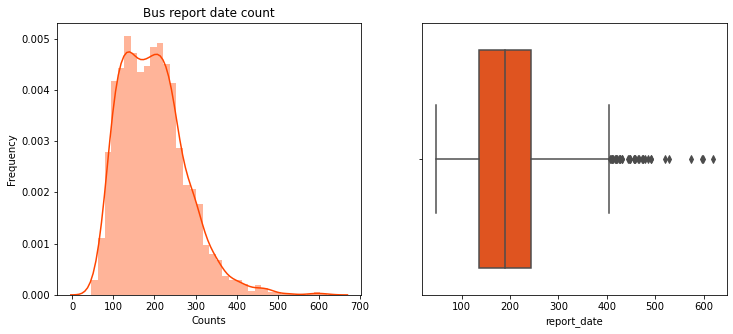

In [23]:
bus_report_date_counts = bus_df.report_date.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(bus_report_date_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Bus report date count");

sns.boxplot(bus_report_date_counts, ax=ax[1], color="orangered");

In [20]:
print('Bus:', np.quantile(bus_report_date_counts, 0.75) - np.quantile(bus_report_date_counts, 0.25))

Bus: 108.0


### Insights
- The bus and streetcar graphs both seem to be right skewed with many outliers on the right.
- The subway graph seem to be a normal distribution.

In [26]:
## 3.4.2 Time counts

In [18]:
bus_df.Time.value_counts()

3:00:00 PM    9280
4:00:00 PM    8965
8:00:00 AM    6547
2:00:00 PM    6219
1:00:00 PM    4126
              ... 
3:59:00 AM      19
4:19:00 AM      19
3:56:00 AM      18
4:11:00 AM      17
3:49:00 AM      15
Name: Time, Length: 1440, dtype: int64

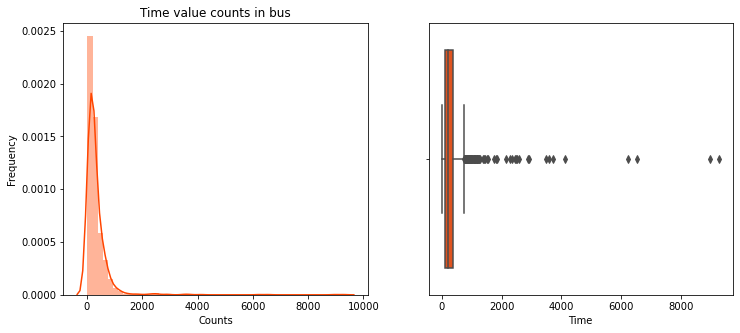

In [42]:
bus_report_date_counts = bus_df.Time.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(bus_report_date_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Time value counts in bus");


sns.boxplot(bus_time_count, ax=ax[1], color="orangered");

### Insights
- A heavily right skewed distribution shown above, it is a sign of certain period is prone to have more delays than other period. 

In [16]:
np.quantile(Report_date_counts_subway, 0.75) - np.quantile(Report_date_counts_subway, 0.25)

19.0

### Route counts

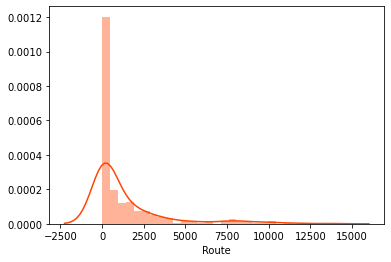

In [30]:
sns.distplot(bus_df.Route.value_counts(), color="orangered", kde=True);


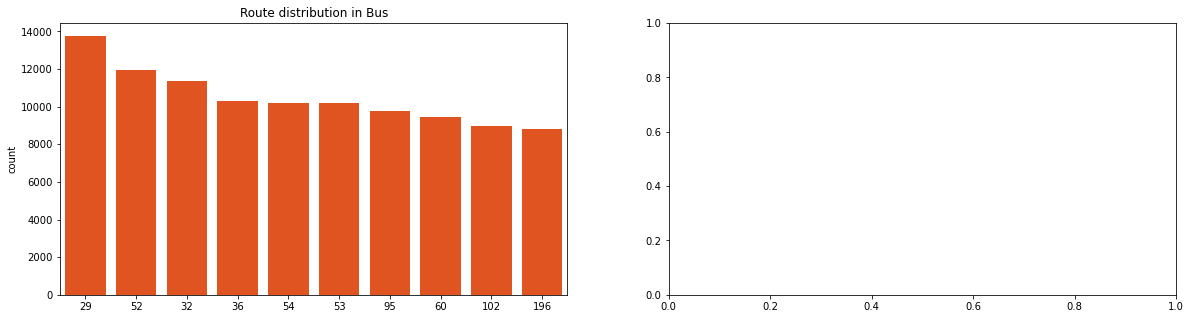

In [31]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(bus_df.Route , order= bus_df.Route.value_counts().iloc[:10].index, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Route distribution in Bus");

- Bus: 29 Dufferin, 52 Lawrence West and 32 Eglinton West
- Street Car: 501 Queen, 504 King and 506 Carlton

### Time counts

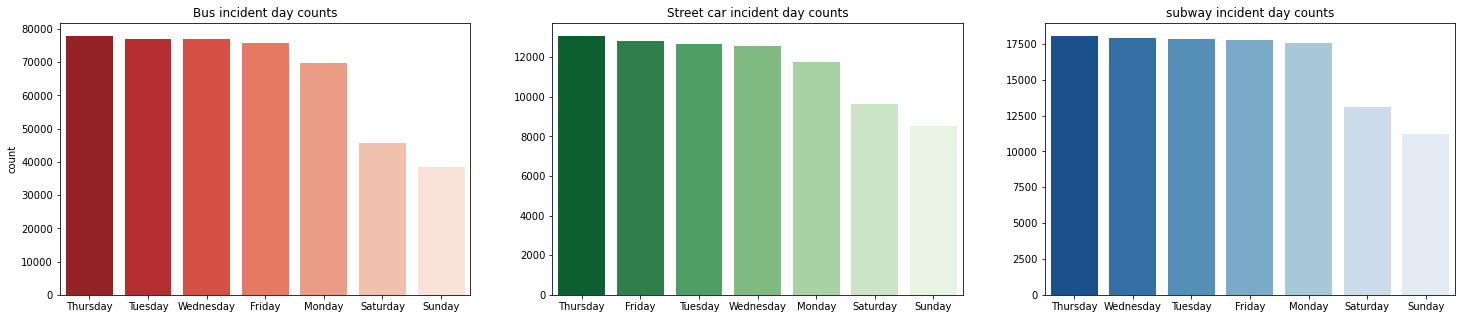

In [20]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
sns.countplot(bus_df.Day, palette="Reds_r", ax=ax[0], order = bus_df.Day.value_counts().index);
ax[0].set_xlabel('')
ax[0].set_title("Bus incident day counts");

sns.countplot(streetcar_df.Day, palette="Greens_r", ax=ax[1], order = streetcar_df.Day.value_counts().index);
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title("Street car incident day counts");

sns.countplot(subway_df.Day, palette="Blues_r", ax=ax[2], order = subway_df.Day.value_counts().index);
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_title("subway incident day counts");

### Top 10 Location and station

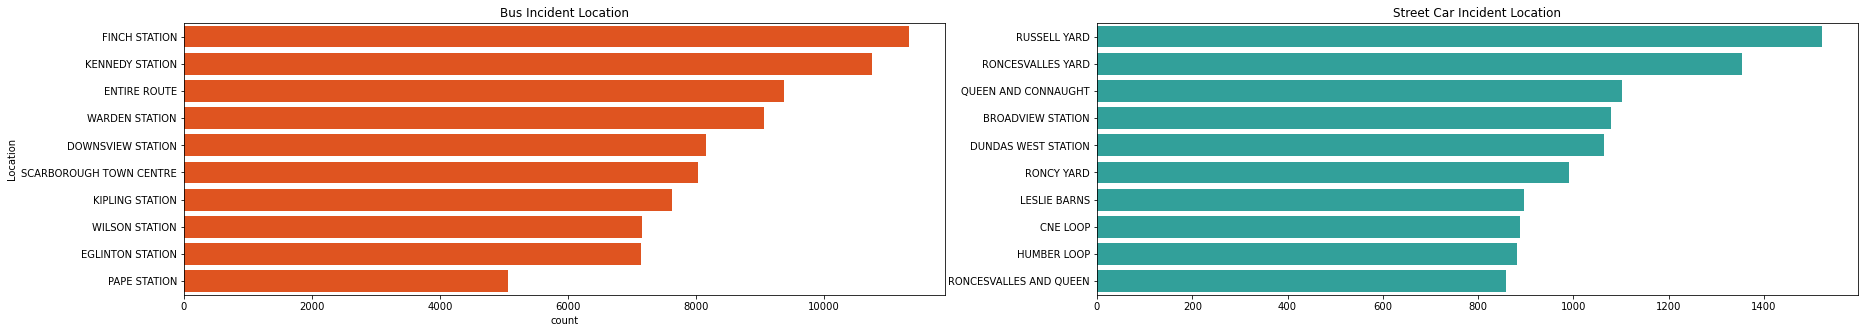

In [21]:
fig, ax = plt.subplots(1,2,figsize=(30,5))

sns.countplot(y=bus_df.Location, order= bus_df.Location.value_counts().iloc[:10].index, ax=ax[0], color="orangered");
ax[0].set_title("Bus Incident Location");
# labels = ax[0].get_xticklabels();
# ax[0].set_xticklabels(labels, rotation=90)

sns.countplot(y=streetcar_df.Location, order= streetcar_df.Location.value_counts().iloc[:10].index, ax=ax[1], color="lightseagreen");
ax[1].set_title("Street Car Incident Location");
ax[1].set_xlabel('');
ax[1].set_ylabel('');

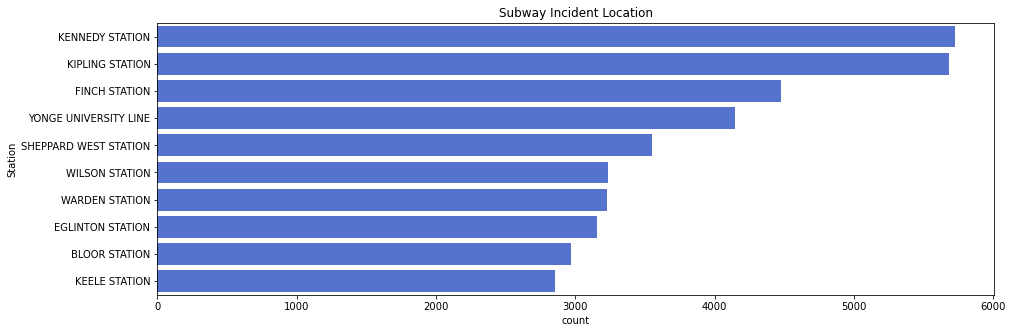

In [22]:
fig, ax =plt.subplots(1,1,figsize=(15,5))
sns.countplot(y=subway_df.Station, order= subway_df.Station.value_counts().iloc[:10].index, ax=ax, color="royalblue");
ax.set_title("Subway Incident Location");

Although Younge University Line is the fourth on our list, there's actually no delays on the record

### Incident and code

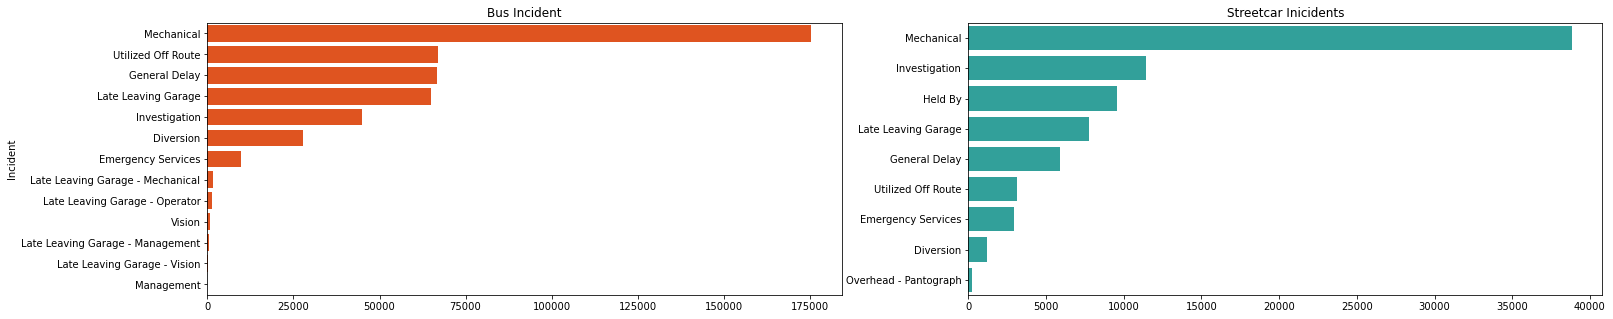

In [23]:
fig, ax = plt.subplots(1,2,figsize=(25,5))

sns.countplot(y=bus_df.Incident, order= bus_df.Incident.value_counts().index, ax=ax[0], color="orangered");
ax[0].set_title("Bus Incident");
ax[0].set_xlabel('');
# labels = ax[0].get_xticklabels();
# ax[0].set_xticklabels(labels, rotation=90)

sns.countplot(y=streetcar_df.Incident, order= streetcar_df.Incident.value_counts().index, ax=ax[1], color="lightseagreen");
ax[1].set_title("Streetcar Inicidents")
ax[1].set_xlabel('');
ax[1].set_ylabel('');

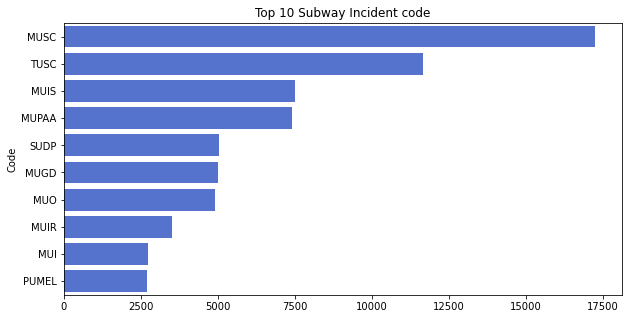

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(y=subway_df.Code, order= subway_df.Code.value_counts().iloc[:10].index, color="royalblue")
ax.set_title("Top 10 Subway Incident code")
ax.set_xlabel('');

Read more about subway delay:
https://www.lowandhigh.xyz/magazine/2019/2/7/dont-be-so-quick-to-blame-the-ttc-for-delays-on-the-subway#:~:text=Miscellaneous%20speed%20control%20is%20when,control%20to%20reset%20and%20proceed

According to TTC subway delay code description:
- MUSC: Miscellaneous Speed Control
- TUSC: Operator Overspeeding
- MUPAA: Passenger Assistance Alarm Activated - No Trouble Found
- MUIS: Injured or ill Customer (In Station) - Transported
- SUDP: Disorderly Patron
- MUO: Miscellaneous Other
- MUGD: Miscellaneous General Delays
- MUIR: Injured or ill Customer (On Train) - Medical Aid Refused
- MUI: Injured or ill Customer (On Train) - Transported
- TUMVS: Operator Violated Signal


### Delay

In [25]:
bus_df.shape

(461405, 18)

In [26]:
#bus_df[~bus_df.isin(['NaN','Inf']).any(axis=1)]

c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


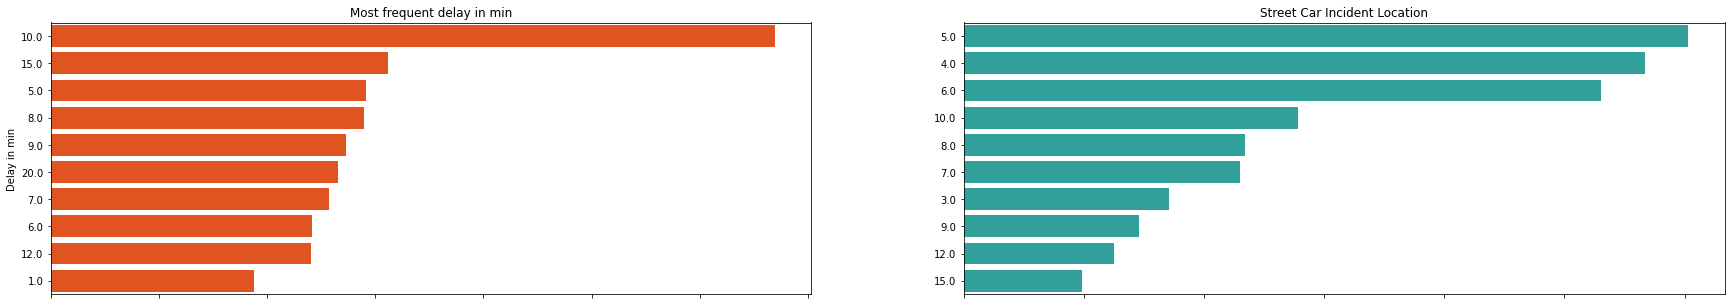

In [27]:
fig, ax = plt.subplots(1,2,figsize=(30,5))

sns.countplot(y=bus_df.delay_min, order= bus_df.delay_min.value_counts().iloc[:10].index, ax=ax[0], color="orangered");
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_title("Most frequent delay in min")
ax[0].set_xlabel('');
ax[0].set_ylabel('Delay in min')

sns.countplot(y=streetcar_df.delay_min, order= streetcar_df.delay_min.value_counts().iloc[:10].index, ax=ax[1], color="lightseagreen");
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_title("Street Car Incident Location");
ax[1].set_xlabel('');
ax[1].set_ylabel('');

Text(0.5, 0, 'delay in min')

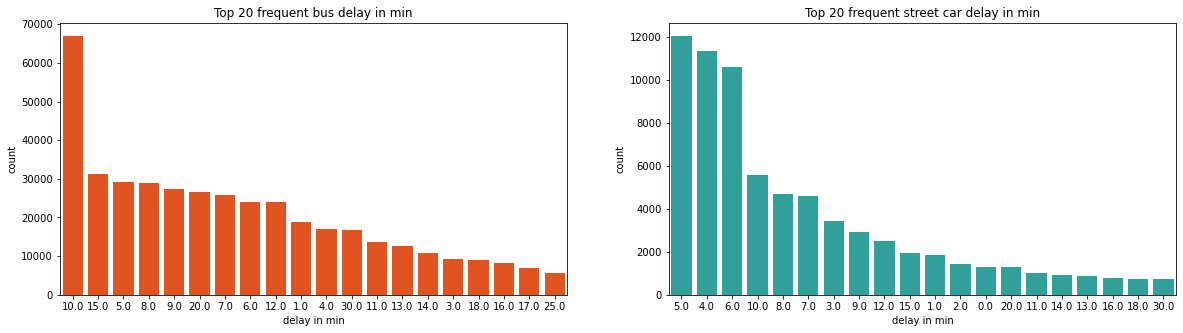

In [28]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(bus_df.delay_min, order=bus_df.delay_min.value_counts().iloc[:20].index, ax=ax[0], color="orangered");
ax[0].set_title("Top 20 frequent bus delay in min")
ax[0].set_xlabel("delay in min")

sns.countplot(streetcar_df.delay_min, order=streetcar_df.delay_min.value_counts().iloc[:20].index, ax=ax[1], color="lightseagreen");
ax[1].set_title("Top 20 frequent street car delay in min")
ax[1].set_xlabel("delay in min")


Text(0, 0.5, 'Delay in min')

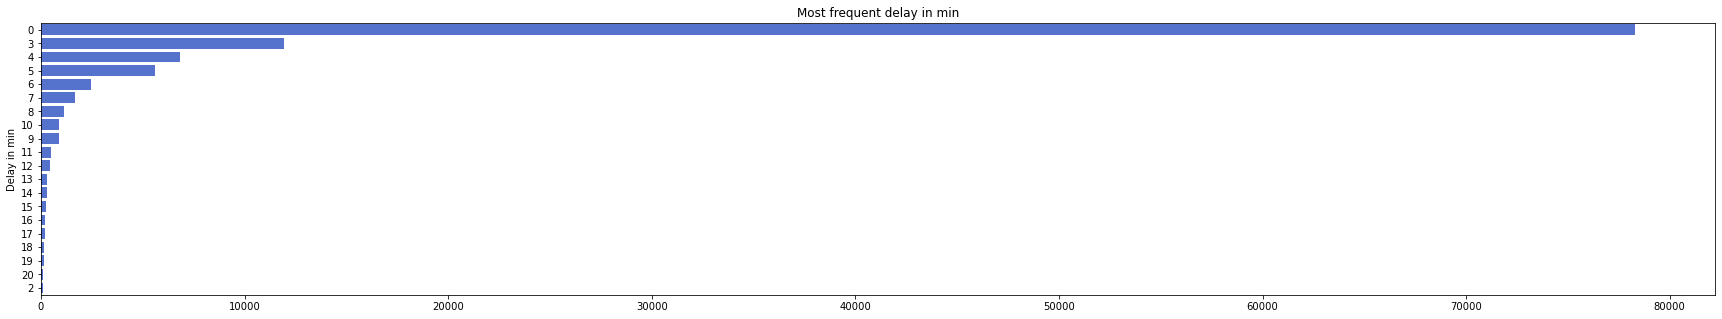

In [29]:
fig, ax = plt.subplots(1,1,figsize=(30,5))

sns.countplot(y=subway_df.delay_min, order= subway_df.delay_min.value_counts().iloc[:20].index, color="royalblue");
ax.set_title("Most frequent delay in min")
ax.set_xlabel('');
ax.set_ylabel('Delay in min')

### Report vehicle

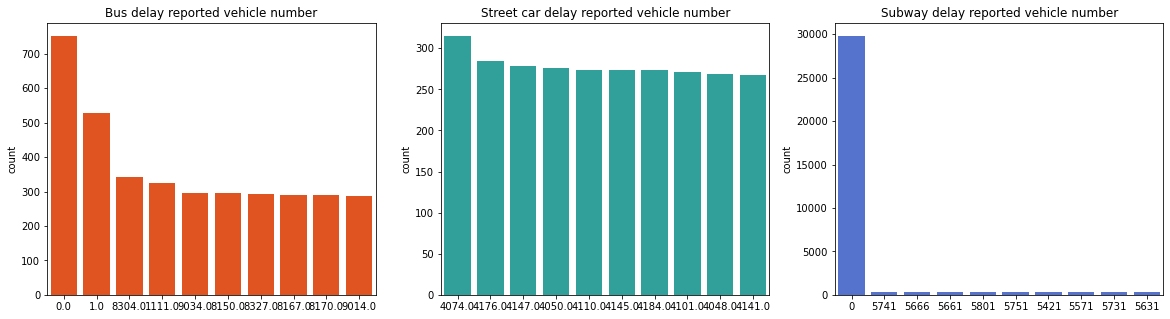

In [30]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.Vehicle, order= bus_df.Vehicle.value_counts().iloc[:10].index, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported vehicle number");

sns.countplot(streetcar_df.Vehicle,  order= streetcar_df.Vehicle.value_counts().iloc[:10].index, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported vehicle number");

sns.countplot(subway_df.Vehicle,order= subway_df.Vehicle.value_counts().iloc[:10].index, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported vehicle number");

### Report date in Year (2014 - 2020)

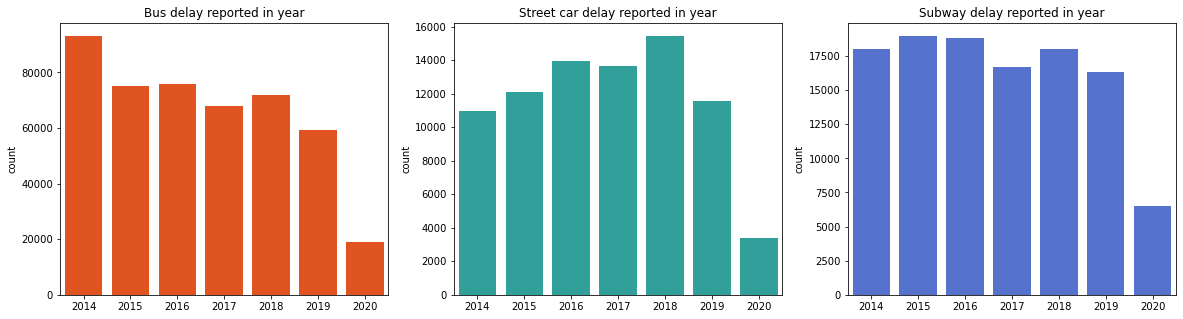

In [31]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.report_year, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in year");

sns.countplot(streetcar_df.report_year, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in year");

sns.countplot(subway_df.report_year, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in year");

- Keep in mind that we only have 6 months of data in 2020 and there's a pandemic in 2020.

### Report date in Month 

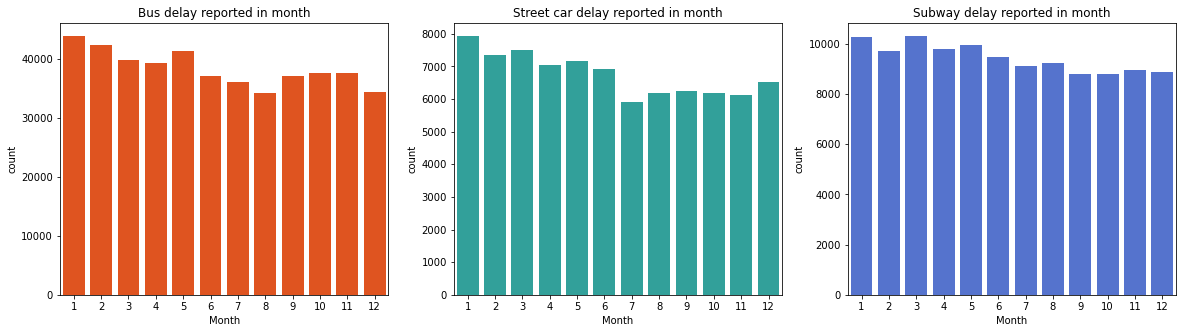

In [32]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.report_month, color="orangered", ax=ax[0]);
ax[0].set_xlabel("Month");
ax[0].set_title("Bus delay reported in month");

sns.countplot(streetcar_df.report_month, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("Month");
ax[1].set_title("Street car delay reported in month");

sns.countplot(subway_df.report_month, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("Month");
ax[2].set_title("Subway delay reported in month");

- January has the most delay records for all three different transits, maybe because it's after the holiday.

### Report date in Day

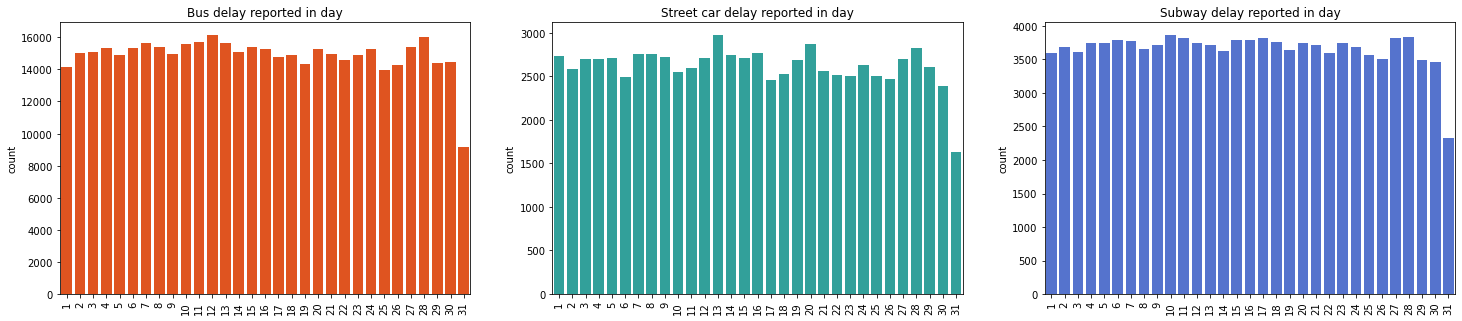

In [33]:
fig, ax = plt.subplots(1,3,figsize=(25,5))

sns.countplot(bus_df.report_day, color="orangered", ax=ax[0]);
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in day");

sns.countplot(streetcar_df.report_day, color="lightseagreen", ax=ax[1]);
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in day");

sns.countplot(subway_df.report_day, color="royalblue", ax=ax[2]);
labels = ax[2].get_xticklabels();
ax[2].set_xticklabels(labels, rotation=90);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in day");

### Report in hour 

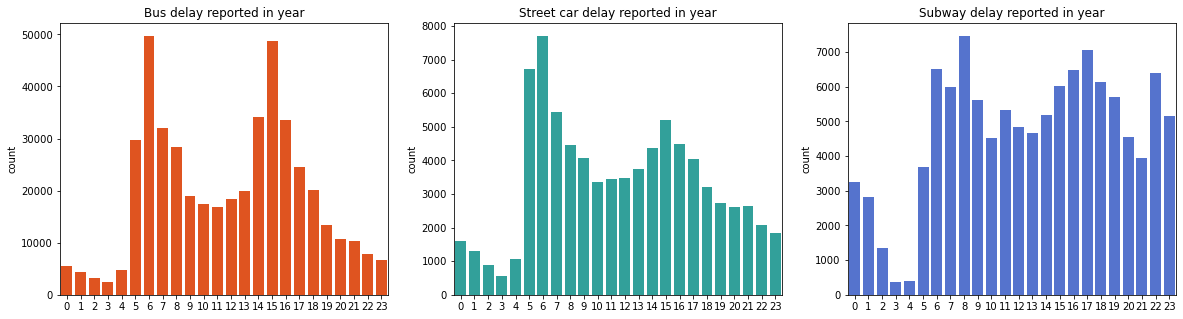

In [34]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.time_hour, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in year");

sns.countplot(streetcar_df.time_hour, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in year");

sns.countplot(subway_df.time_hour, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in year");

- In the bus dataset, 6 AM and 3 PM has the most delay count.
- For street car, it is also 6 AM and follow by 5 AM. 
- For subway, delays happened mostly in 8 AM and 5 PM which are rush hours. (This fits into my person experience with the subway trains)

### Report in min 

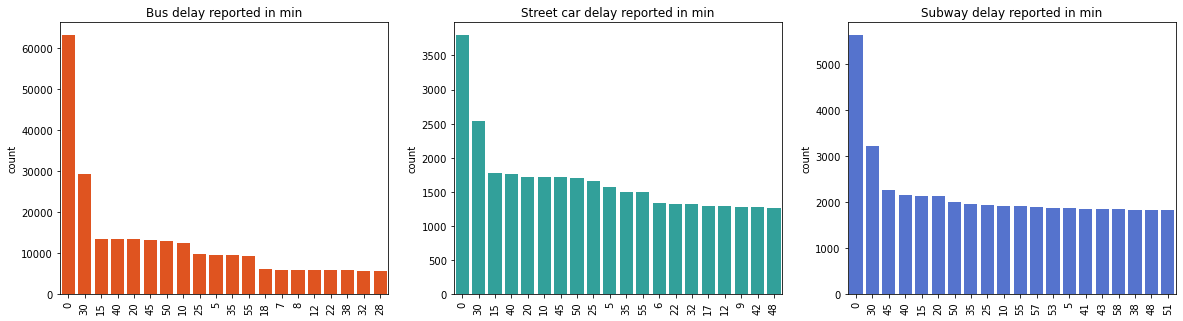

In [35]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.time_min, order= bus_df.time_min.value_counts().iloc[:20].index, color="orangered", ax=ax[0]);
labels = ax[0].get_xticklabels();
ax[0].set_xticklabels(labels, rotation=90);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in min");

sns.countplot(streetcar_df.time_min, order= streetcar_df.time_min.value_counts().iloc[:20].index, color="lightseagreen", ax=ax[1]);
labels = ax[1].get_xticklabels();
ax[1].set_xticklabels(labels, rotation=90);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in min");

sns.countplot(subway_df.time_min, order= subway_df.time_min.value_counts().iloc[:20].index , color="royalblue", ax=ax[2]);
labels = ax[2].get_xticklabels();
ax[2].set_xticklabels(labels, rotation=90);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in min");

### Reported delay at station

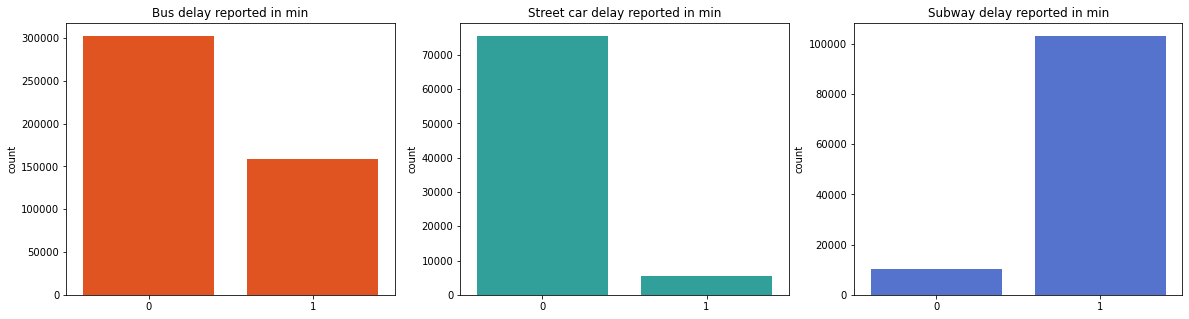

In [36]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.at_station, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in min");

sns.countplot(streetcar_df.at_station, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in min");

sns.countplot(subway_df.at_station, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in min");

### Reported delay type

- Short delay is less than 10 minutes.
- Medium delay is between 10 to 30 minutes.
- Long delay is more than 30 minutes.

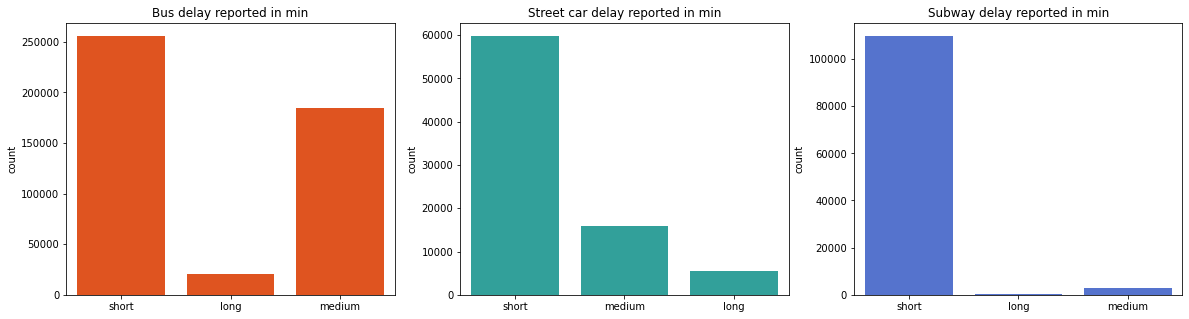

In [37]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.delay_type, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in min");

sns.countplot(streetcar_df.delay_type, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in min");

sns.countplot(subway_df.delay_type, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in min");

- Out of all 3 different delays, all 3 transits have mostly short delay.
- Bus also has a lot of medium delays.
- Subway has almost no medium and long delays.

### Reported delay in direction
B is both ways

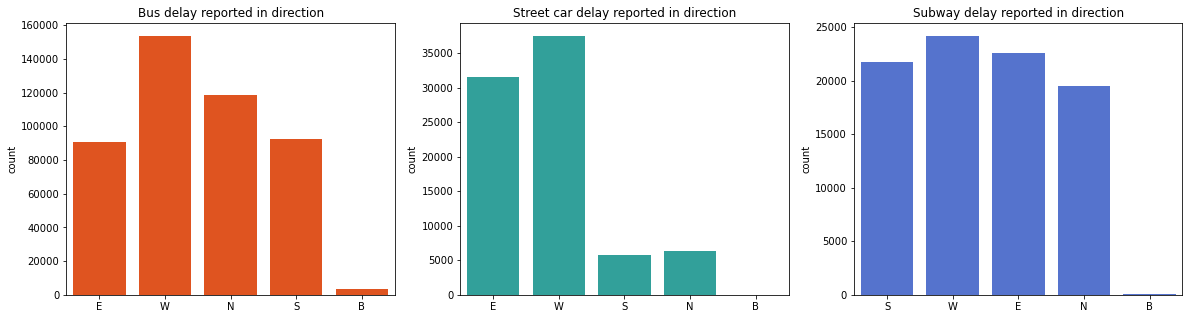

In [38]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(bus_df.direction_simp, color="orangered", ax=ax[0]);
ax[0].set_xlabel("");
ax[0].set_title("Bus delay reported in direction");

sns.countplot(streetcar_df.direction_simp, color="lightseagreen", ax=ax[1]);
ax[1].set_xlabel("");
ax[1].set_title("Street car delay reported in direction");

sns.countplot(subway_df.Bound, color="royalblue", ax=ax[2]);
ax[2].set_xlabel("");
ax[2].set_title("Subway delay reported in direction");


- All 3 trasits have the most delay heading West.

### Subway line delay

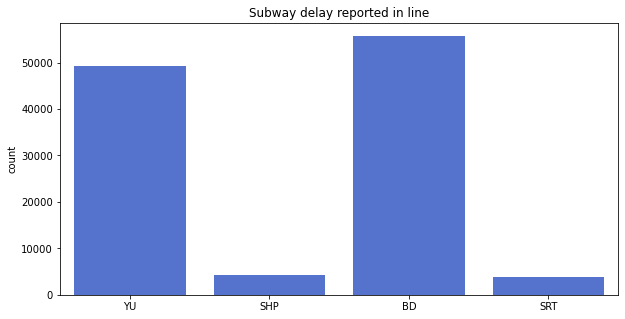

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.countplot(subway_df.line_simp, color="royalblue");
ax.set_xlabel("");
ax.set_title("Subway delay reported in line");

- Interesting to see that line 2 Bloor-Danforth has more records of delay than line 1 Yonge-University.
- It's expected to see that line 3 Scarborough and line 4 Sheppard have less records since they are much shorter than line 1 and line 2.

Feature-feature interactions

### Bus

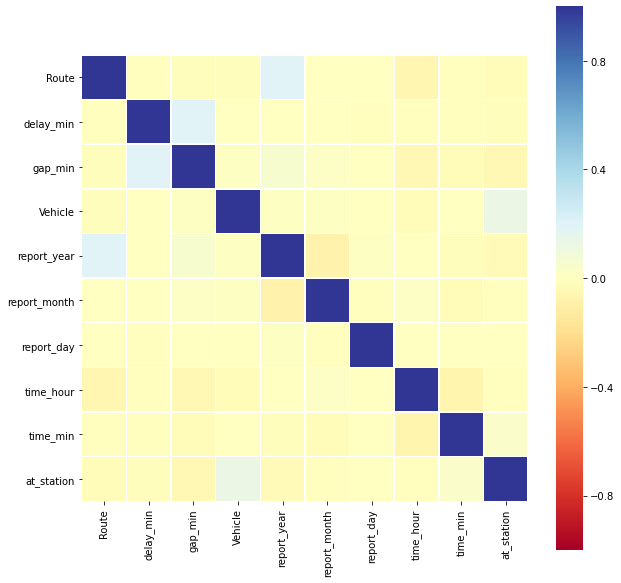

In [41]:
plt.figure(figsize=(10,10));
sns.heatmap(bus_df.corr(), cmap="RdYlBu", vmin=-1, vmax=1, linewidth=.5,square=True);

### Insights
- There are very slight correlations.

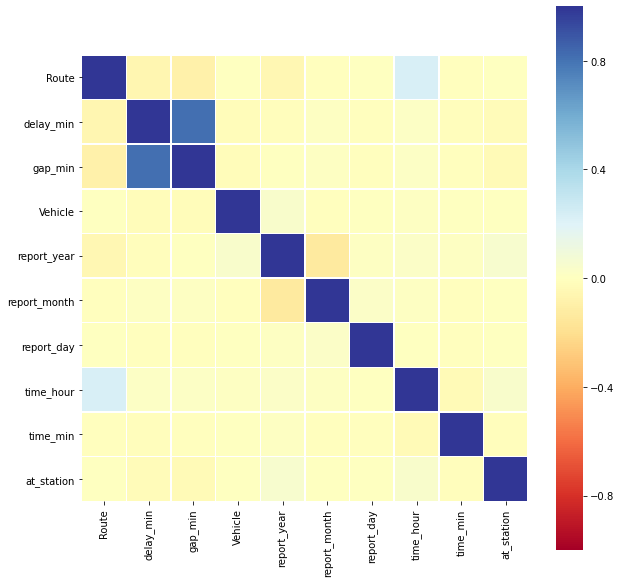

In [42]:
plt.figure(figsize=(10,10));
sns.heatmap(streetcar_df.corr(), cmap="RdYlBu", vmin=-1, vmax=1, linewidth=.5,square=True);

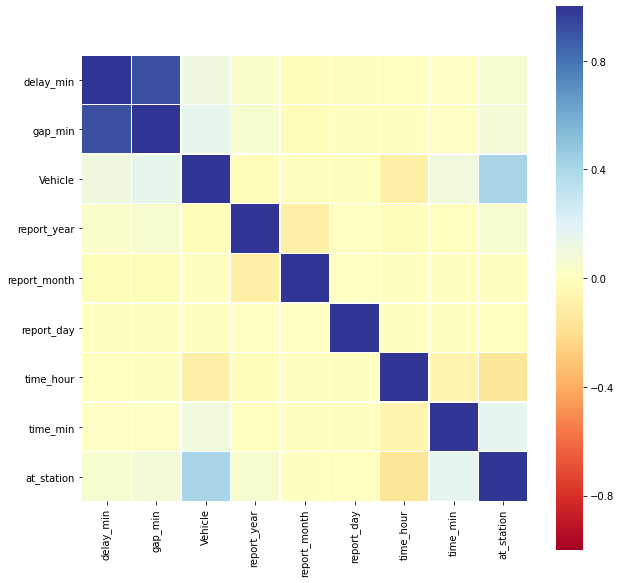

In [43]:
plt.figure(figsize=(10,10));
sns.heatmap(subway_df.corr(), cmap="RdYlBu", vmin=-1, vmax=1, linewidth=.5,square=True);

In [44]:
bus_df_pivots  = bus_df[['report_date', 'Route', 'Time', 'Day', 'Location', 'Incident',
        'gap_min', 'Vehicle', 'report_year',
       'report_month', 'report_day', 'time_hour', 'time_min', 'at_station',
       'delay_type', 'direction_simp','delay_min']]

In [45]:
for i in bus_df_pivots.columns:
    print(i)
    print(pd.pivot_table(bus_df_pivots, index = i , values="delay_min").sort_values("delay_min", ascending=False))

report_date
               delay_min
report_date             
2014-03-01   1305.183246
2018-05-27    112.169643
2018-07-29    108.495935
2019-08-04     92.813333
2018-05-26     92.729730
...                  ...
2020-03-24      9.442623
2015-01-21      9.361789
2015-01-26      9.288660
2020-03-23      8.887218
2020-03-25      8.780347

[2343 rows x 1 columns]
Route
        delay_min
Route            
474    280.000000
140    191.500000
135    162.006803
359    114.000000
62      88.768649
...           ...
459      1.000000
157      1.000000
906      0.750000
383      0.666667
907      0.500000

[335 rows x 1 columns]
Time
              delay_min
Time                   
8:55:00 PM  1040.365145
4:02:00 AM   212.097561
4:50:00 AM   175.393293
5:14:00 AM   140.665339
5:15:00 AM   140.459552
...                 ...
6:23:00 AM     9.200809
6:44:00 AM     9.188889
7:09:00 AM     9.159132
7:01:00 AM     9.125307
7:27:00 AM     8.512360

[1440 rows x 1 columns]
Day
           delay_min
Day    

ValueError: Grouper for 'delay_min' not 1-dimensional

In [46]:
streetcar_df_pivots  = streetcar_df[['report_date', 'Route', 'Time', 'Day', 'Location', 'Incident',
        'gap_min', 'Vehicle', 'report_year',
       'report_month', 'report_day', 'time_hour', 'time_min', 'at_station',
       'delay_type', 'direction_simp','delay_min']]

In [47]:
for i in streetcar_df_pivots.columns:
    print(i)
    print(pd.pivot_table(streetcar_df_pivots, index = i , values="delay_min").sort_values("delay_min", ascending=False))

report_date
              delay_min
report_date            
2014-10-19   161.523810
2020-02-02    97.538462
2014-06-07    74.666667
2016-04-24    72.473684
2016-12-25    68.882353
...                 ...
2016-02-18     5.361702
2014-01-03     5.348837
2014-07-25     4.944444
2019-01-10     4.722222
2014-02-01     4.500000

[2309 rows x 1 columns]
Route
       delay_min
Route           
304    31.608209
317    30.837838
310    25.885714
306    23.096471
301    22.393970
514    20.626667
508    19.241573
502    15.400633
503    14.903863
501    13.258604
506    13.200394
504    12.389170
509    11.883416
505    11.802718
511    11.683461
510    11.531641
512    11.029478
500     7.857143
550     7.333333
591     7.000000
595     6.000000
594     6.000000
596     6.000000
519     6.000000
516     5.500000
375     4.000000
535     1.487805
307     1.000000
513     1.000000
536     0.600000
Time
             delay_min
Time                  
2:04:00 AM  125.083333
4:02:00 AM  100.000000
4:30

ValueError: Grouper for 'delay_min' not 1-dimensional

In [48]:
subway_df_pivots  = subway_df[['report_date', 'Time', 'Day', 'Station', 'Code', 'gap_min',
       'Bound', 'Line', 'Vehicle', 'report_year', 'report_month', 'report_day',
       'time_hour', 'time_min', 'at_station', 'line_simp', 'delay_type','delay_min']]

In [49]:
subway_df.columns

Index(['report_date', 'Time', 'Day', 'Station', 'Code', 'delay_min', 'gap_min',
       'Bound', 'Line', 'Vehicle', 'report_year', 'report_month', 'report_day',
       'time_hour', 'time_min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

In [50]:
for i in subway_df_pivots.columns:
    print(i)
    print(pd.pivot_table(subway_df_pivots, index = i , values="delay_min").sort_values("delay_min", ascending=False))

report_date
             delay_min
report_date           
2015-02-17   19.963636
2018-10-20   16.111111
2015-02-07   12.708333
2016-05-19   12.396226
2017-06-03   11.552632
...                ...
2015-03-18    0.382353
2017-05-07    0.250000
2015-03-21    0.211538
2017-07-09    0.157895
2015-12-25    0.153846

[2373 rows x 1 columns]
Time
             delay_min
Time                  
4:47:00 AM   38.600000
6:56:00 AM   13.867470
5:16:00 AM   11.684211
12:35:00 PM  10.904762
8:28:00 PM    9.527778
...                ...
3:05:00 AM    0.000000
3:04:00 AM    0.000000
4:17:00 AM    0.000000
4:18:00 AM    0.000000
3:36:00 AM    0.000000

[1437 rows x 1 columns]
Day
           delay_min
Day                 
Saturday    2.269707
Tuesday     2.163229
Sunday      2.109722
Monday      2.021444
Thursday    2.018725
Wednesday   2.007752
Friday      1.998084
Station
                        delay_min
Station                          
SPADINA TO OSGOODE         159.00
LAWRENCE EAST TO ELLES     148.0

ValueError: Grouper for 'delay_min' not 1-dimensional

# Learnt from Ken Jee eda

In [ ]:
bus_df.corr()

In [ ]:
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(bus_df.corr(),  square=True, linewidths=.5)

In [ ]:
bus_df.columns

In [ ]:
bus_df_cat = bus_df[['Day','Incident','delay_type','direction_simp']]

In [ ]:
bus_df_large_cat = bus_df[['report_date',"Time"]]

In [ ]:
for i in bus_df_large_cat.columns:
    cat_num = bus_df_large_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [ ]:
bus_df.columns

In [ ]:
pd.pivot_table(bus_df, index="Incident", values="delay_min").sort_values("delay_min", ascending = False)

In [ ]:
pd.set_option("display.max_rows", 50)

In [ ]:
pd.pivot_table(bus_df, index=["Incident","direction_simp"], values="delay_min", aggfunc="count").sort_values("delay_min", ascending=False)

In [ ]:
pd.pivot_table(bus_df[bus_df.direction_simp == "S"], index="Incident", values="delay_min").sort_values("delay_min", ascending=False)

In [ ]:
pd.pivot_table(bus_df, index="direction_simp", values="delay_min")

In [ ]:
pd.pivot_table(bus_df_pivots, index= "Incident", columns="at_station", values="delay_min", aggfunc="count")

In [51]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [52]:
bus_df_notna = bus_df[bus_df['Location'].notna()]

In [53]:
bus_df_notna

,report_date,Route,Time,Day,Location,Incident,delay_min,gap_min,Direction,Vehicle,report_year,report_month,report_day,time_hour,time_min,at_station,delay_type,direction_simp
0,2014-01-01,95,12:23:00 AM,Wednesday,YORK MILLS STATION,Mechanical,10.0,20.0,E,1734.0,2014,1,1,0,23,1,short,E
1,2014-01-01,102,12:55:00 AM,Wednesday,ENTIRE RUN FOR ROUTE,General Delay,33.0,66.0,b/w,8110.0,2014,1,1,0,55,0,long,W
2,2014-01-01,54,1:28:00 AM,Wednesday,LAWRENCE AND WARDEN,Mechanical,10.0,20.0,WB,7478.0,2014,1,1,1,28,0,short,W
3,2014-01-01,112,1:30:00 AM,Wednesday,KIPLING STATION,Emergency Services,18.0,36.0,N,8084.0,2014,1,1,1,30,1,medium,N
4,2014-01-01,24,1:37:00 AM,Wednesday,VP AND ELLESMERE,Investigation,10.0,20.0,n,7843.0,2014,1,1,1,37,0,short,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461400,2020-05-31,25,11:13:00 PM,Sunday,DON MILLS AT LAWRENCE,Mechanical,10.0,20.0,N/B,8671.0,2020,5,31,23,13,0,short,N
461401,2020-05-31,163,11:15:00 PM,Sunday,LAWRENCE WEST STATION,Mechanical,14.0,28.0,S/B,8311.0,2020,5,31,23,15,1,medium,S
461402,2020-05-31,47,11:30:00 PM,Sunday,YORKDALE,Mechanical,20.0,40.0,S/B,1057.0,2020,5,31,23,30,0,medium,S
461403,2020-05-31,62,11:35:00 PM,Sunday,BROADVIEW STATION,Mechanical,20.0,40.0,E/B,8513.0,2020,5,31,23,35,1,medium,E


In [54]:
words = " ".join(bus_df_notna['Location'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

unwanted = ['station'

text = " ".join([ele for ele in words_filtered if ele not in unwanted])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

SyntaxError: invalid syntax (<ipython-input-54-49eb85cbf0f2>, line 18)

In [ ]:
streetcar_df_notna = streetcar_df[streetcar_df['Location'].notna()]

In [ ]:
words = " ".join(streetcar_df_notna['Location'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [55]:
# Only look at record at station
subway_df_station = subway_df[subway_df['Station'].str.contains('STATION')]

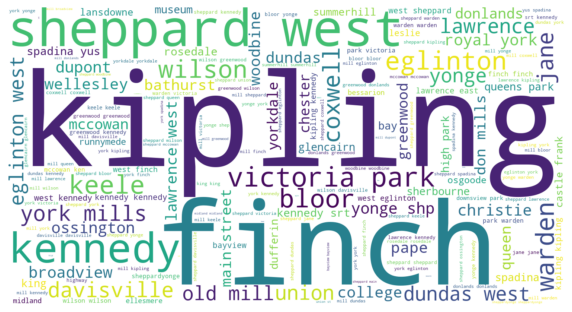

In [56]:
words = " ".join(subway_df_station['Station'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

unwanted = ['station','bd']

text = " ".join([ele for ele in words_filtered if ele not in unwanted])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [57]:
subway_df.Station

0                 BLOOR STATION
1                 FINCH STATION
2                 FINCH STATION
3             YONGE SHP STATION
4                WILSON STATION
                  ...          
113384          KIPLING STATION
113385     YUSBDSHEPPARD SUBWAY
113386    VICTORIA PARK STATION
113387    BLOOR DANFORTH SUBWAY
113388    SHEPPARD WEST STATION
Name: Station, Length: 113389, dtype: object